In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import json

## Plot LMP

In [2]:
res_dir = "/Users/hanshu/Desktop/Price_formation/Result"

run_dates = {
            # "SB" : datetime(2024,10,19).strftime("%Y-%m-%d"), 
            "PF" : datetime(2024,11,1).strftime("%Y-%m-%d"),
            "MF" : datetime(2024,11,1).strftime("%Y-%m-%d"),
            "WF" : datetime(2024,11,1).strftime("%Y-%m-%d"),
            "BF" : datetime(2024,11,1).strftime("%Y-%m-%d"),
            "DR" : datetime(2024,11,1).strftime("%Y-%m-%d"),}

In [3]:
from datetime import datetime
import collections
LMPS = {}
min_LMP = collections.defaultdict(list)
time_index = None
min_time_index = None
for POLICY in run_dates.keys():
    rundate = run_dates[POLICY]
    filedate = datetime(2019,1,1).strftime("%Y-%m-%d")
    file = os.path.join(res_dir, "Master_"+POLICY, POLICY+'_'+rundate, f"UC_{filedate}.json")
    ed_file = os.path.join(res_dir, "Master_"+POLICY, 'ED_'+POLICY+'_'+rundate, f"ED_{filedate}.json")
    with open(file, 'r') as f:
        data = json.load(f)
        LMPS[POLICY] = data['Hourly average LMP']
        time_index = data['Time']
    with open(ed_file, 'r') as f:
        data = json.load(f)
        for d in data['LMP']:
            min_LMP[POLICY].extend(d)

In [12]:

import math
min_len = min([len(LMPS[key]) for key in LMPS.keys()])
LMPS = {key: LMPS[key][:min_len] for key in LMPS.keys()}
LMP_df = pd.DataFrame(LMPS)
LMP_df['Time'] = time_index
LMP_df.Time = pd.to_datetime(LMP_df.Time)
new_order = ['Time', 'PF', 'MF', 'BF', 'WF', 'DR']
LMP_df = LMP_df[new_order]
# LMP_df = LMP_df.rename(columns={"SB":"SB", "PF":"PF", "NR":"MF", "BF":"BF", "BF2":"BF2", "WF":"WF", "DR":"DR"})

In [6]:
LMP_df.describe().round(2)

,PF,MF,WF,BF,DR,Time
count,744.00,744.00,744.00,744.00,744.00,744
mean,31.12,89.78,27.52,32.97,64.32,2019-01-16 11:30:00
min,0.00,0.00,0.00,0.00,0.00,2019-01-01 00:00:00
25%,28.68,28.63,27.70,28.05,28.60,2019-01-08 17:45:00
50%,30.78,30.88,28.99,30.23,30.87,2019-01-16 11:30:00
75%,33.16,34.43,31.00,32.39,34.40,2019-01-24 05:15:00
max,106.79,5000.00,55.91,1017.12,4390.66,2019-01-31 23:00:00
std,7.32,393.86,7.95,51.72,256.49,NaN


In [9]:
min_len = min([len(min_LMP[POLICY]) for POLICY in min_LMP.keys()])
min_LMP = {POLICY : min_LMP[POLICY][:min_len] for POLICY in min_LMP.keys()}
min_time_index = pd.date_range(start='2019-01-01', periods=min_len, freq='5T')
min_LMP_df = pd.DataFrame(min_LMP, index=min_time_index)

In [10]:
min_LMP_df.describe().round(2)

,PF,MF,WF,BF,DR
count,8928.00,8928.00,8928.00,8928.00,8928.00
mean,31.12,89.78,27.52,32.97,64.32
std,13.50,428.78,8.54,80.25,290.29
min,0.00,0.00,0.00,0.00,0.00
25%,28.69,28.69,27.88,28.00,28.69
50%,30.53,30.53,28.69,30.22,30.53
75%,33.69,35.06,31.09,31.62,35.06
max,810.45,5000.00,236.21,5000.00,5000.00


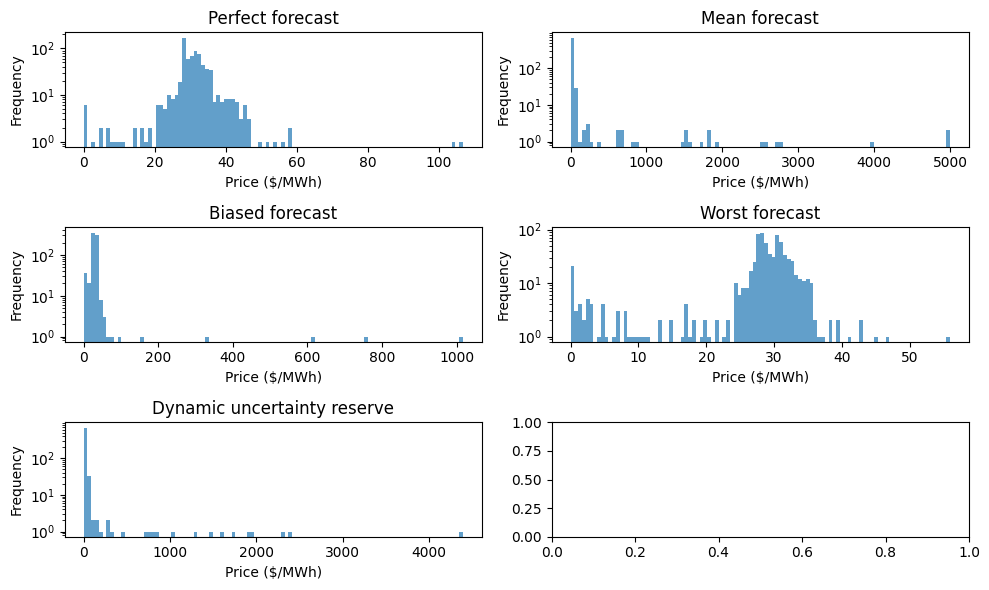

In [14]:
policy_names = {"SB": "Stochastic benchmark",
                "PF": "Perfect forecast", 
                "MF": "Mean forecast", 
                "BF":"Biased forecast", 
                "WF": "Worst forecast", 
                "DR":"Dynamic uncertainty reserve"}
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(5):
    ax[i//2, i%2].hist(LMP_df.iloc[:,i+1], bins=100, alpha=0.7)
    ax[i//2, i%2].set_title(policy_names[LMP_df.columns[i+1]])
    ax[i//2, i%2].set_xlabel("Price ($/MWh)")
    ax[i//2, i%2].set_ylabel("Frequency")
    ax[i//2, i%2].set_yscale('log')
    # ax[i//2, i%2].set_xlim(-25, 200)
    # ax[i//2, i%2].grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


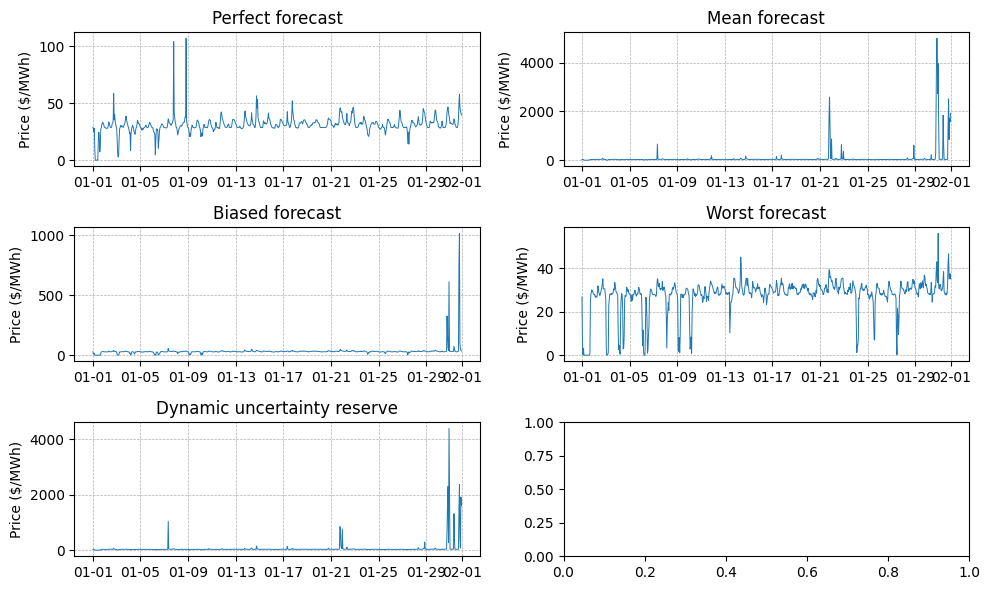

In [16]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(5):
    ax[i//2, i%2].plot(LMP_df.Time, LMP_df.iloc[:,i+1], linewidth=0.7)
    ax[i//2, i%2].set_title(policy_names[LMP_df.columns[i+1]])
    ax[i // 2, i % 2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax[i // 2, i % 2].tick_params(axis='x')
    ax[i//2, i%2].set_ylabel("Price ($/MWh)")
    ax[i//2, i%2].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [5]:
# POLICY = "WF"
# rundate = datetime(2024,10,20).strftime("%Y-%m-%d")
# filedate = datetime(2019,1,1).strftime("%Y-%m-%d")
# file = os.path.join(res_dir, "Master_"+POLICY, POLICY+'_'+rundate, f"UC_{filedate}.json")
# with open(file, 'r') as f:
#     data = json.load(f)
#     LMPS["WF2"] = data['Hourly average LMP']

In [127]:
min_len

497

In [17]:
df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result/revenue_cost.csv')
# custom_order = [1,5,3,4,2,0]  # New order based on index
# df = df.loc[custom_order].reset_index(drop=True)
# df.at[2, 'POLICY'] = 'MF'
df

,POLICY,Gen_energy_revenue,Gen_reserve_revenue,Fast_gen_profits,Nuclear_profits,Storage_profits,Thermal_profits,All_gen_profits,TotalCosts,Load_curtailment,Genfuel_cost,Gen_integer_cost,Load_curtailment_penalty,Wind_curt,Solar_curt
0,MF,1.459532e+09,2.886600e+07,5.753388e+07,2.184634e+08,1.783363e+08,7.353848e+08,1.308798e+09,1.825258e+08,585.130211,1.766142e+08,2985922.0,2.925651e+06,4423.862042,1513.961835
1,DR,1.009440e+09,1.993375e+07,3.256421e+07,1.547618e+08,1.277791e+08,4.474658e+08,8.501418e+08,1.809081e+08,335.317632,1.762140e+08,3017506.0,1.676588e+06,5374.641140,839.947891
2,WF,3.914482e+08,0.000000e+00,3.790542e+06,6.265932e+07,5.466847e+07,3.400881e+07,2.015217e+08,1.899265e+08,0.000000,1.836847e+08,6241838.0,0.000000e+00,11458.004118,2481.690072
3,BF,4.822555e+08,3.089444e+06,7.577593e+06,7.630381e+07,6.550366e+07,9.989287e+07,3.027317e+08,1.826269e+08,2.727239,1.789939e+08,3619408.0,1.363620e+04,6371.344020,3062.592774
4,PF,4.410692e+08,5.572716e+05,4.998135e+06,7.164844e+07,6.181719e+07,7.386501e+07,2.637510e+08,1.778754e+08,0.000000,1.762246e+08,1650814.0,0.000000e+00,1717.754502,243.895327


[Text(0.2, 0, 'MF'),
 Text(1.2, 0, 'DR'),
 Text(2.2, 0, 'WF'),
 Text(3.2, 0, 'BF'),
 Text(4.2, 0, 'PF')]

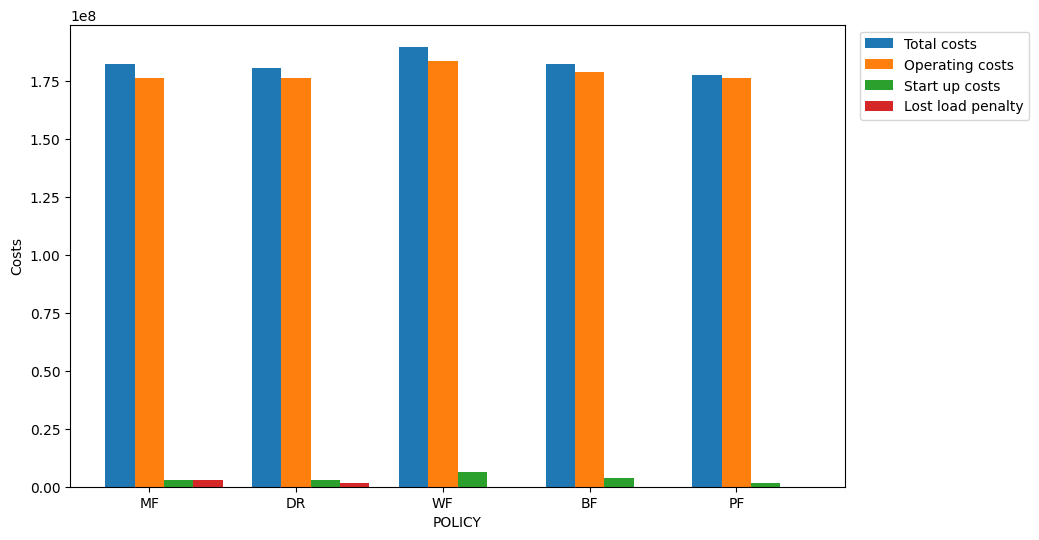

In [18]:
x = np.arange(len(df['POLICY']))
plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(4):
    ax.bar(x + i*width, df[plotcols[i]], width, label=colnames[i])
ax.set_xlabel('POLICY')
ax.set_ylabel('Costs')
# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xticks(x + width)  # Centering the labels
ax.set_xticklabels(df['POLICY'])

[Text(0.2, 0, 'MF'),
 Text(1.2, 0, 'DR'),
 Text(2.2, 0, 'WF'),
 Text(3.2, 0, 'BF'),
 Text(4.2, 0, 'PF')]

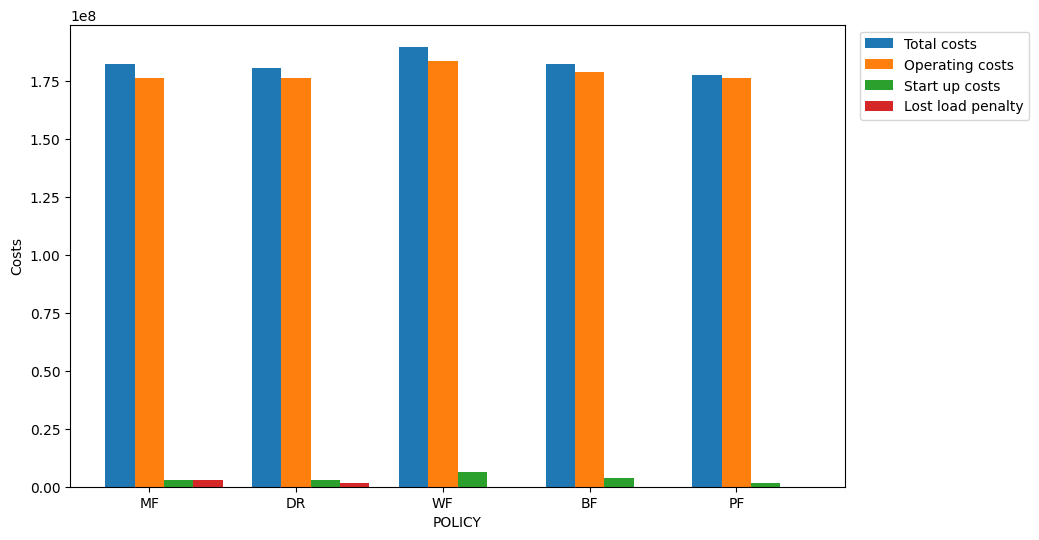

In [19]:
x = np.arange(len(df['POLICY']))
plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(4):
    ax.bar(x + i*width, df[plotcols[i]], width, label=colnames[i])
ax.set_xlabel('POLICY')
ax.set_ylabel('Costs')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xticks(x + width)  # Centering the labels
ax.set_xticklabels(df['POLICY'])

In [114]:

df

,POLICY,Gen_energy_revenue,Gen_reserve_revenue,Fast_gen_profits,Nuclear_profits,Storage_profits,Thermal_profits,All_gen_profits,TotalCosts,Load_curtailment,Genfuel_cost,Gen_integer_cost,Load_curtailment_penalty,Wind_curt,Solar_curt
0,SB,2.462093e+08,2.778161e+04,6.066836e+06,6.486118e+07,3.478457e+07,5.951285e+07,1.545985e+08,9.163857e+07,-3.224680e-12,9.001847e+07,1620097.80,-1.612340e-08,9477.475069,775.465602
1,PF,2.603418e+08,2.797419e+05,6.406594e+06,6.925265e+07,3.697312e+07,7.103043e+07,1.721557e+08,8.846587e+07,0.000000e+00,8.755724e+07,908628.14,0.000000e+00,3710.044159,100.728346
2,MF,3.792863e+08,6.797808e+06,1.269021e+07,9.818595e+07,5.119546e+07,1.512863e+08,2.971584e+08,8.892778e+07,4.016182e-01,8.764818e+07,1277592.71,2.008091e+03,6906.004304,286.240769
3,BF,2.473527e+08,2.503324e+05,6.175360e+06,6.462240e+07,3.466782e+07,6.056701e+07,1.556980e+08,9.190776e+07,5.392547e-01,9.026570e+07,1639373.29,2.696273e+03,9339.631909,701.188974
4,WF,2.246379e+08,2.620000e+02,5.691755e+06,5.806916e+07,3.143272e+07,4.305576e+07,1.290016e+08,9.563656e+07,0.000000e+00,9.315564e+07,2480910.90,0.000000e+00,13907.836709,856.057027
5,DR,3.081161e+08,3.666386e+06,9.299823e+06,8.059318e+07,4.254465e+07,1.041247e+08,2.226256e+08,8.915690e+07,0.000000e+00,8.777491e+07,1381992.41,0.000000e+00,6989.918130,313.505720


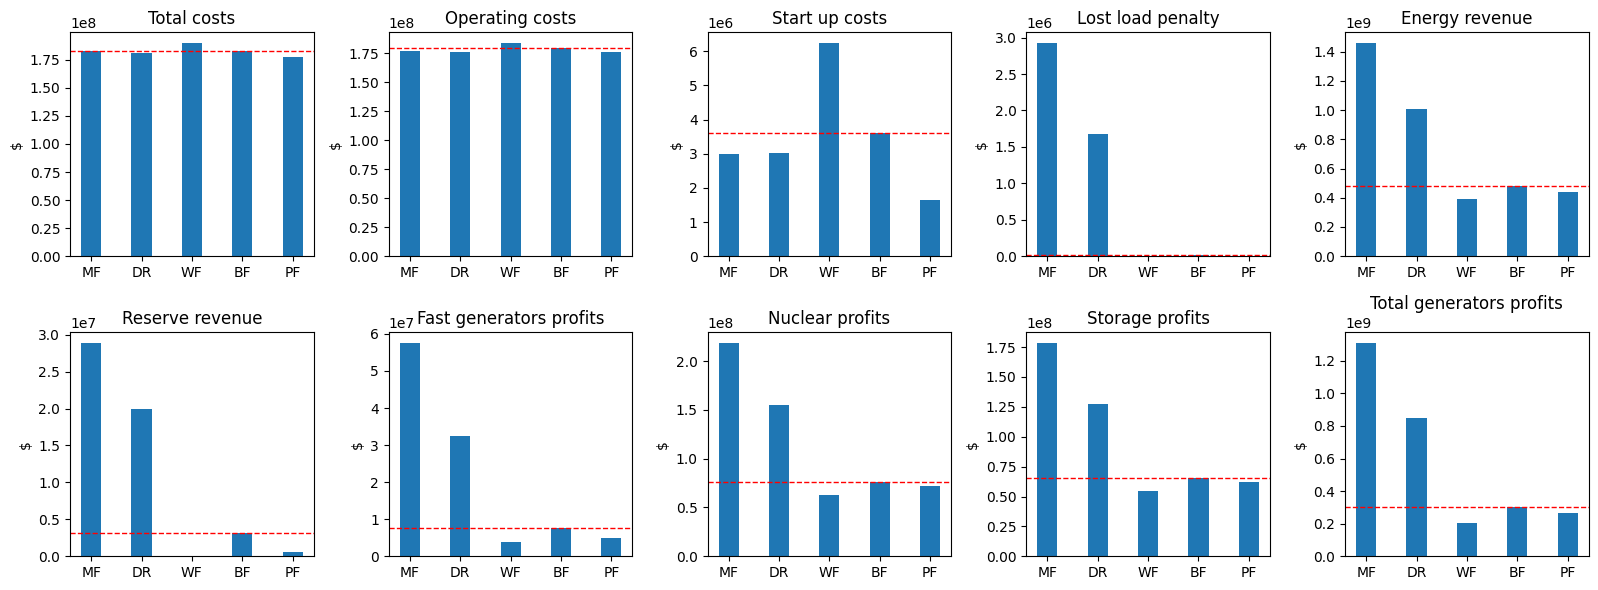

In [25]:
# plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
# colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
columns = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty', 'Gen_energy_revenue', 'Gen_reserve_revenue', 'Fast_gen_profits', 'Nuclear_profits', 'Storage_profits', 'All_gen_profits']
column_titles = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty', 'Energy revenue', 'Reserve revenue', 'Fast generators profits', 'Nuclear profits', 'Storage profits', 'Total generators profits']
x = np.arange(len(df['POLICY']))  # Label locations for categories
width = 0.4  # Width of each bar

# Plotting the bars
fig, ax = plt.subplots(2,5,figsize=(16,6))
for i in range(len(columns)):
    ax[i//5, i%5].bar(df['POLICY'], [df.iloc[j][columns[i]] for j in range(len(df))], width)
    ax[i//5, i%5].axhline(y=df.iloc[3][columns[i]], color='red', linestyle='--', linewidth=1) #plot(, linestyle = '--', color='red', label='Base case')
    ax[i//5, i%5].set_ylabel('$')
    ax[i//5, i%5].set_xticks(x)  # Centering the labels
    ax[i//5, i%5].set_title(column_titles[i])
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [24]:
df

,POLICY,Gen_energy_revenue,Gen_reserve_revenue,Fast_gen_profits,Nuclear_profits,Storage_profits,Thermal_profits,All_gen_profits,TotalCosts,Load_curtailment,Genfuel_cost,Gen_integer_cost,Load_curtailment_penalty,Wind_curt,Solar_curt
0,MF,1.459532e+09,2.886600e+07,5.753388e+07,2.184634e+08,1.783363e+08,7.353848e+08,1.308798e+09,1.825258e+08,585.130211,1.766142e+08,2985922.0,2.925651e+06,4423.862042,1513.961835
1,DR,1.009440e+09,1.993375e+07,3.256421e+07,1.547618e+08,1.277791e+08,4.474658e+08,8.501418e+08,1.809081e+08,335.317632,1.762140e+08,3017506.0,1.676588e+06,5374.641140,839.947891
2,WF,3.914482e+08,0.000000e+00,3.790542e+06,6.265932e+07,5.466847e+07,3.400881e+07,2.015217e+08,1.899265e+08,0.000000,1.836847e+08,6241838.0,0.000000e+00,11458.004118,2481.690072
3,BF,4.822555e+08,3.089444e+06,7.577593e+06,7.630381e+07,6.550366e+07,9.989287e+07,3.027317e+08,1.826269e+08,2.727239,1.789939e+08,3619408.0,1.363620e+04,6371.344020,3062.592774
4,PF,4.410692e+08,5.572716e+05,4.998135e+06,7.164844e+07,6.181719e+07,7.386501e+07,2.637510e+08,1.778754e+08,0.000000,1.762246e+08,1650814.0,0.000000e+00,1717.754502,243.895327


In [27]:
perunint_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result/PerUnitProfit.csv')
perunint_df.round(2)
# custom_order = [1,5,3,4,2,0]  # New order based on index
# perunint_df = perunint_df.loc[custom_order].reset_index(drop=True)
# perunint_df.at[2, 'POLICY'] = 'MF'
# perunint_df

,POLICY,Fast,Nuclear,Thermal,BA,PH,wind,solar,hydro
0,MF,18712.03,64937.69,24167.71,66792.63,66792.63,74927.06,33908.05,51698.98
1,DR,10591.02,46002.57,14705.53,47857.34,47857.34,50308.51,32655.68,35805.51
2,WF,1232.82,18625.32,1117.67,20475.08,20475.08,17373.04,27502.49,14604.65
3,BF,2464.50,22681.12,3282.88,24533.21,24533.21,22043.01,29592.62,17800.99
4,PF,1625.57,21297.32,2427.50,23152.51,23152.51,19860.90,30736.59,16565.59


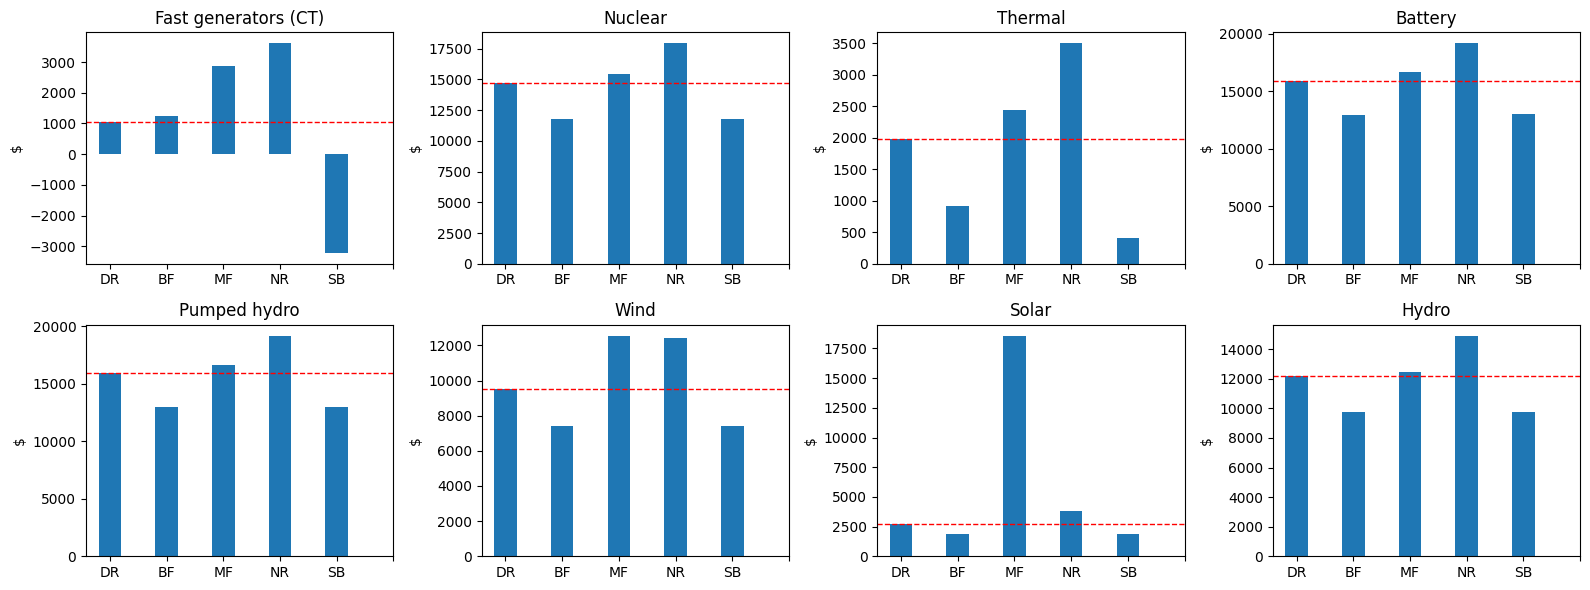

In [14]:
map_dict = {'Fast': 'Fast generators (CT)', 'Nuclear': 'Nuclear', 'Storage': 'Storage', 'PH':'Pumped hydro', 
            'BA':'Battery', 'solar':'Solar', 'wind':'Wind', 'hydro':'Hydro', 'Thermal':'Thermal'}
x = np.arange(len(perunint_df['POLICY']))  # Label locations for categories
width = 0.4  # Width of each bar

# Plotting the bars
fig, ax = plt.subplots(2,4,figsize=(16,6))
for i in range(len(perunint_df.columns)-1):
    ax[i//4, i%4].bar(perunint_df['POLICY'], [perunint_df.iloc[j][i+1] for j in range(len(perunint_df))], width)
    ax[i//4, i%4].axhline(y=perunint_df.iloc[0][i+1], color='red', linestyle='--', linewidth=1) #plot(, linestyle = '--', color='red', label='Base case')
    ax[i//4, i%4].set_ylabel('$')
    ax[i//4, i%4].set_xticks(x)  # Centering the labels
    ax[i//4, i%4].set_title(map_dict[perunint_df.columns[i+1]])
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [49]:
perunint_df.columns[3]

'Thermal'

In [3]:
hydro_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/NYGrid/hydro_2019.csv')
print("The maximum hydro generation is: ", hydro_df.Gen_MW.max())
wind_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/ARPAE_NYISO/Clean_CSV/Hour/wind_actuals_2019_hourly_BA.csv')
print("The maximum wind generation is: ", wind_df.BA_total.max())
solar_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/ARPAE_NYISO/Clean_CSV/Hour/solar_actuals_2019_hourly_BA.csv')
print("The maximum solar generation is: ", solar_df.BA_total.max())

The maximum hydro generation is:  4738.0
The maximum wind generation is:  1798.6622698166666
The maximum solar generation is:  448.9000012899999


In [61]:
solar_df.describe().round(2)
wind_df.describe().round(2)

,hour,BA_total
count,8760.00,8760.00
mean,11.50,88.89
std,6.92,126.62
min,0.00,0.00
25%,5.75,0.00
50%,11.50,2.23
75%,17.25,161.53
max,23.00,448.90


In [30]:
file = '/Users/hanshu/Desktop/Price_formation/Result/Master_BF/BF_2024-11-01/UC_2019-01-01.json'
with open(file, 'r') as f:
    data = json.load(f)
    print(data.keys())
    print(data['Energy Revenues'].keys())

dict_keys(['Time', 'Hourly average LMP', 'Hourly average reserve price 10Spin', 'Hourly average reserve price 10Total', 'Hourly average reserve price 30Total', 'Hourly average reserve price 60Total', 'Charge consumers', 'Curtailment', 'Generator Dispatch', 'Energy Revenues', 'Reserve Revenues', 'Storage Energy', 'Other Profits', 'Commitment status', 'Start up', 'Shut down'])
dict_keys(['Gowanus 2-5', 'Holtsville 04', 'Barrett ST 02', 'Holtsville 03', 'Gowanus 2-3', 'Batavia', 'Gowanus 1-5', 'Gowanus 2-8', 'Gowanus 3-1', 'Gowanus 3-2', 'Hellgate 1', 'Jamestown 7', 'Port Jefferson GT 03', 'Narrows 2-3', 'Astoria GT 01', 'Caithness_CC_1', 'Glenwood GT 02', 'West Babylon 4', 'Glenwood GT 05', 'Holtsville 06', 'Jamestown 6', 'Oswego 6', 'Gowanus 1-1', 'Gowanus 3-6', 'Narrows 1-7', 'Nassau Energy Corporation', 'Narrows 1-2', 'Astoria Energy 2 - CC3', 'EMPIRE_CC_1', 'Narrows 1-5', 'Astoria GT 4-2', 'Gowanus 2-1', 'General Mills Inc', 'Gowanus 4-4', 'Holtsville 07', 'Narrows 1-4', 'Glenwood GT